In [1]:
%%file helper_func/load_all.m
function imgs = load_all(imgpath, names, print)
    imgs = {}; addpath(imgpath);

    for i=1:length(names)
        img = im2double(imread(names{i}));
        if length(size(img))==3
            img = rgb2gray(img);
        end
        imgs{end+1} = img;

        if print
            f = figure;
            imshow(img);
        end
    end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\load_all.m'.


In [2]:
addpath('helper_func/');
filenames = {'moonlanding.png', 'psnr2.png'};
part2imgs = load_all('/', filenames, false);

In [3]:
%%file helper_func/myconv.m
function conved = myconv(img, kernel, ks)
    pad = ks;
    imgS = size(img);
    alpha = padarray(img,[pad, pad],'replicate');
    alpha = imfilter(alpha, kernel, 'conv');
    conved = alpha(1+pad:imgS(1)+pad, 1+pad:imgS(2)+pad);
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\myconv.m'.


In [51]:
%%file helper_func/part2LU.m
function subtract = part2LU(img, ratio, limC, nxn, print)
[w, h] = size(img);
I = img;
I=I-mean(I(:)); % Should I take zero-mean?
shiftedF = fftshift(fft2(I));
shiftedM=abs(shiftedF);

minM = min(shiftedM(:))
maxM = max(shiftedM(:))

L = ratio(1);
U = ratio(2);

threshL= maxM * L + minM * (1.0-L)
threshU= maxM * U + minM * (1.0-U)

param = 9;

max3x3 = ordfilt2(shiftedM, 9, ones(nxn, nxn));

where = (shiftedM == max3x3) & (shiftedM > threshL)  & (shiftedM < threshU);;

[r, c] = find(where);
% whos r
for i=1:length(r)
    if (w-r(i))^2+(h-c(i))^2 > limC^2
        if r(i) > limC & c(i) > limC
            shiftedF(r(i)-limC:r(i)+limC,c(i)-limC:c(i)+limC)=0;
        end
    end
end

subtract=real(ifft2(fftshift(shiftedF)));

% subtract = medfilt2(subtract);


if print
    f = figure;
    a = subplot(2, 2, 1);
    imshow(log(shiftedM + 1), []),colormap(gray),title('original magunitude');
    
    a = subplot(2, 2, 2);
    imshow(log(max3x3 + 1), []),colormap(gray), title('max');
    
    a = subplot(2, 2, 3);
    imshow(where>0, []),colormap(gray),title('where to change');

    a = subplot(2, 2, 4);
    imshow(log(abs(shiftedF) + 1), []),colormap(gray),title('new magunitude');
end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part2LU.m'.



minM =

   1.5798e-09


maxM =

   3.6967e+04


threshL =

   1.1090e+04


threshU =

   3.7337e+04




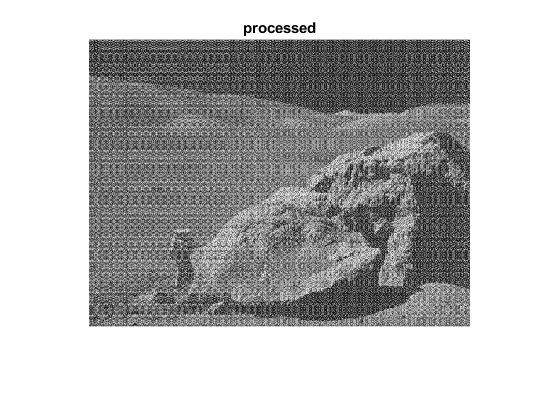

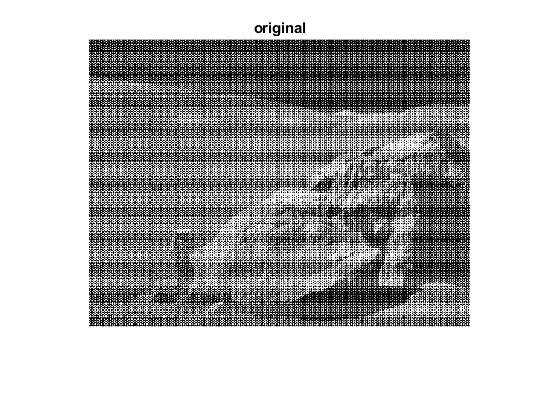

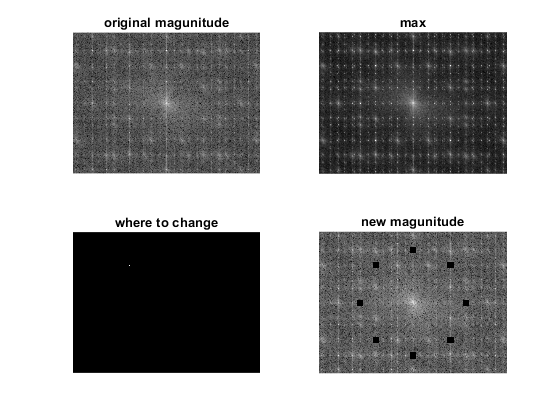

In [53]:
LBUB = [0.3, 1.01];
moon_test = part2LU(part2imgs{1}, LBUB, 10, 3, true);
f = figure;
imshow(part2imgs{1}, []);
title('original');

f = figure;
imshow(moon_test, []);
title('processed');


minM =

     0


maxM =

   1.0781e+04


threshL =

   3.2344e+03


threshU =

   5.3907e+03




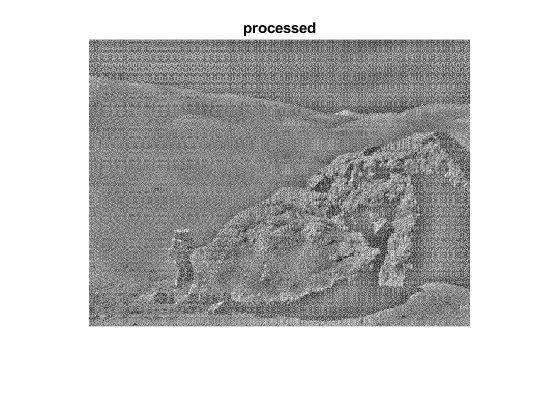

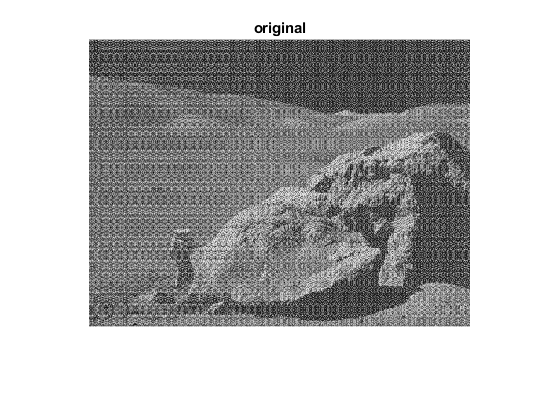

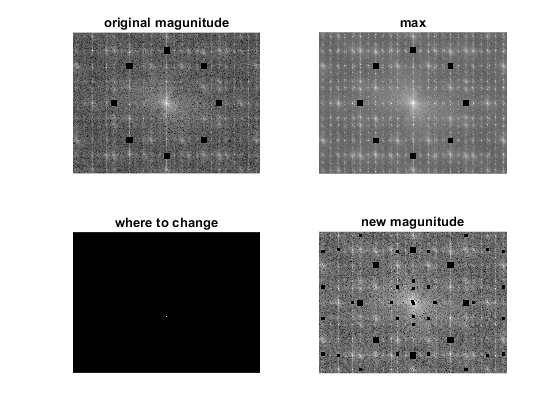

In [55]:
LBUB = [0.3, 0.5];
moon_test2 = part2LU(moon_test, LBUB, 5, 3, true);

f = figure;
imshow(moon_test, []);
title('original');

f = figure;
imshow(moon_test2, []);
title('processed')

In [60]:
%%file helper_func/part2_blacknoise.m
function subtract = part2_blacknoise(img, ratio, limC, nxn, print)
[w, h] = size(img);
I = img;
I=I-mean(I(:)); % Should I take zero-mean?
shiftedF = fftshift(fft2(I));
shiftedM=abs(shiftedF);

minM = min(shiftedM(:))
maxM = max(shiftedM(:))

L = ratio(1);
U = ratio(2);

threshL= maxM * L + minM * (1.0-L)
threshU= maxM * U + minM * (1.0-U)

param = 9;

max3x3 = ordfilt2(shiftedM, 9, ones(nxn, nxn));

where = (shiftedM == max3x3) & ((shiftedM > threshL)  | (shiftedM < threshU));

[r, c] = find(where);
% whos r
for i=1:length(r)
    if (w-r(i))^2+(h-c(i))^2 > limC^2
        if r(i) > limC & c(i) > limC
            shiftedF(r(i)-limC:r(i)+limC,c(i)-limC:c(i)+limC)=0;
        end
    end
end

subtract=real(ifft2(fftshift(shiftedF)));

% subtract = medfilt2(subtract);


if print
    f = figure;
    a = subplot(2, 2, 1);
    imshow(log(shiftedM + 1), []),colormap(gray),title('original magunitude');
    
    a = subplot(2, 2, 2);
    imshow(log(max3x3 + 1), []),colormap(gray), title('max');
    
    a = subplot(2, 2, 3);
    imshow(where>0, []),colormap(gray),title('where to change');

    a = subplot(2, 2, 4);
    imshow(log(abs(shiftedF) + 1), []),colormap(gray),title('new magunitude');
end
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part2_blacknoise.m'.



minM =

   1.8183e-10


maxM =

   4.8470e+03


threshL =

   48.4703


threshU =

   3.8776e+03




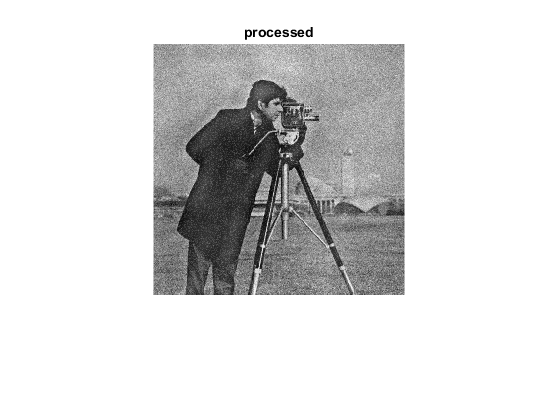

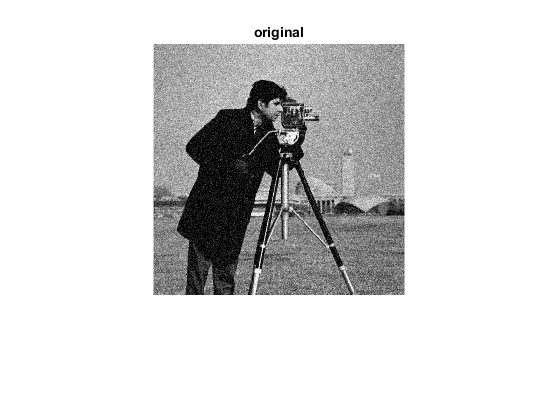

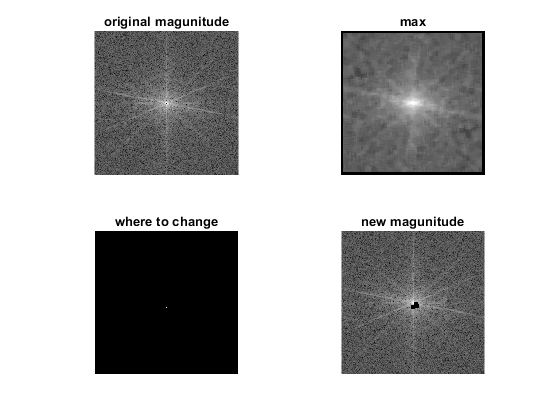

In [113]:
LBUB = [0.01, 0.8];
moon_test = part2LU(part2imgs{2}, LBUB, 3, 10, true);
f = figure;
imshow(part2imgs{2}, []);
title('original');

f = figure;
imshow(moon_test, []);
title('processed');

In [9]:
%%file helper_func/part2_temp.m
function subtract = part2_temp(img, ksize, sigma)

    limC = 1;

    f = figure;
    [imgM, imgP] = part1bstep3(img);
    
    [w, h] = size(img);
    I = img;
    I=I-mean(I(:)); % Should I take zero-mean?
    shiftedF = fftshift(fft2(I));
    
    log_imgM = log(1 + imgM);
    filter = (log_imgM > .8*max(log_imgM(:)) ) | (log_imgM < .15*max(log_imgM(:)) );
    
    
    pattern = real(abs(ifft2(imgM .* exp(j * imgP) .* filter)));
%     subtract  = real(abs(ifft2(imgM .* exp(j * imgP) .* (1-filter)))) + 0.5;
    
    [r, c] = find(1-filter);
    % whos r
    for i=1:length(r)
        if (w-r(i))^2+(h-c(i))^2 > limC^2
            if r(i) > limC & c(i) > limC
                imgM(r(i)-limC:r(i)+limC,c(i)-limC:c(i)+limC)=0;
            end
        end
    end

%     subtract=real(ifft2(fftshift(shiftedF)));
    subtract  = real(abs(ifft2(imgM .* exp(j * imgP))));

    f = figure;
    a = subplot(3, 2, 1);
    imshow(fftshift(filter),[]);;
    title('filter');
    
    a = subplot(3, 2, 2);
    imshow(log(abs(shiftedF) + 1), []),colormap(gray),title('new magunitude');
    title('shiftedF');
    
    a = subplot(3, 2, 3);
    imshow(log(imgM + 1), []),colormap(gray),title('new magunitude');
    title('originalM');
    

    a = subplot(3, 2, 4);
    imshow(img);;
    title('original');
    
    a = subplot(3, 2, 5);
    imshow(pattern);;
    title('pattern?');
    
    a = subplot(3, 2, 6);
    imshow(subtract, []);;
    title('subtract');
    
end

Created file 'C:\Users\Momoko\Desktop\CS211A\VisualComp\HW2\helper_func\part2_temp.m'.


In [ ]:
moon_test = part2_temp(part2imgs{1}, 10, 2);